In [47]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', 199)  # or 199

import seaborn as sns
from glob import glob
import re

import matplotlib.pyplot as plt 
import plotly.graph_objects as go
import plotly.express as px
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import  LabelEncoder, OrdinalEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import GridSearchCV
from IPython.core.display import HTML

from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report

rc={'axes.labelsize': 15, 'font.size': 15, 'legend.fontsize': 15, 'axes.titlesize': 15}
plt.rcParams.update(**rc)

HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [2]:
#!pip install scikit-learn==0.23.2

In [3]:
df = pd.read_csv("df_eda.csv"); 
df.drop([col for col in df.columns.tolist() if 'Unnamed' in col] , axis = 'columns', inplace=True)

In [4]:
df.shape

(1352, 25)

# Variaveis categóricas

In [5]:
cols_cat = df.select_dtypes(include=['object']).columns.tolist()
cols_cat.remove('desligado')
df[cols_cat].head(2)

,viagens,departamento,campo_da_educacao,genero,cargo
0,Rarely,Research & Development,Life Sciences,Male,Research Director
1,Rarely,Human Resources,Medical,Male,Manager


In [6]:
df = pd.concat([df,pd.get_dummies(df[cols_cat] , prefix=cols_cat)], axis=1)

In [7]:
df.shape

(1352, 48)

In [8]:
df[cols_cat+['desligado']] = df[cols_cat+['desligado']].apply(LabelEncoder().fit_transform)

In [9]:
df.shape

(1352, 48)

In [10]:
df.head()

,idade,desligado,viagens,departamento,distancia_de_casa,nivel_educacional,campo_da_educacao,id_do_empregado,satisfacao_com_ambiente,genero,envolvimento_com_o_trabalho,cargo,satisfacao_com_trabalho,renda_mensal,numero_de_companhias_que_trabalhou,percentual_de_aumento_salarial,desempenho,satisfacao_com_relacionamento,anos_de_trabalho,treinamentos_no_ultimo_ano,equilibrio_vida_trabalho,anos_na_empresa,anos_desde_a_ultima_promocao,anos_com_atual_gestor,target,viagens_Frequently,viagens_Non-Travel,viagens_Rarely,departamento_Human Resources,departamento_Research & Development,departamento_Sales,campo_da_educacao_Human Resources,campo_da_educacao_Life Sciences,campo_da_educacao_Marketing,campo_da_educacao_Medical,campo_da_educacao_Other,campo_da_educacao_Technical Degree,genero_Female,genero_Male,cargo_Healthcare Representative,cargo_Human Resources,cargo_Laboratory Technician,cargo_Manager,cargo_Manufacturing Director,cargo_Research Director,cargo_Research Scientist,cargo_Sales Executive,cargo_Sales Representative
0,43.0,0,2,1,30.0,3,1,1255,3,1,1,5,4,197.000000,3,14,3,2,25.0,2,3,8,0,7,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,40.0,0,2,0,60.0,2,3,1550,3,1,3,3,4,16437.000000,1,21,4,4,21.0,2,3,21,7,7,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
2,31.0,0,2,1,80.0,5,1,1430,1,0,3,5,2,16422.000000,3,11,3,3,9.0,3,4,3,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,49.0,0,2,1,220.0,4,4,1655,1,0,3,5,2,16413.000000,3,16,3,2,27.0,2,3,4,1,2,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0
4,44.0,0,2,1,280.0,3,1,1523,4,1,3,5,1,13492.333333,3,13,3,3,24.0,1,4,20,14,17,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0


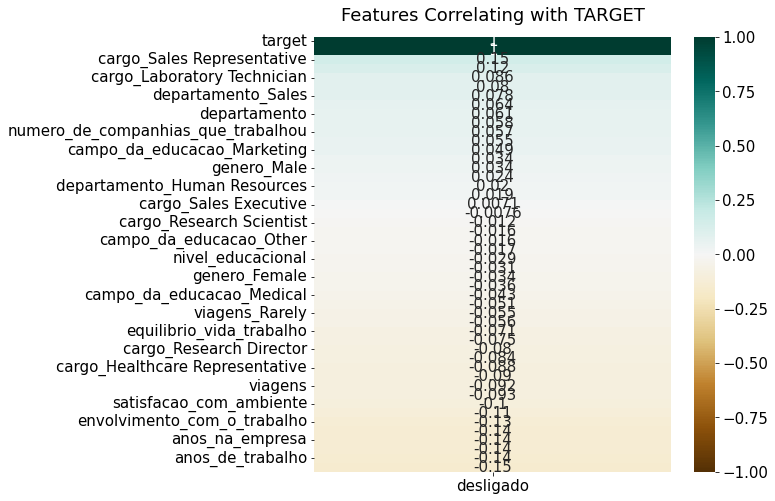

In [11]:
plt.figure(figsize=(8, 8))
heatmap = sns.heatmap(df.corr()[['desligado']].sort_values(by='desligado', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with TARGET', fontdict={'fontsize':18}, pad=16);

In [33]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Balanceamento dos dados

In [13]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(df.drop(['target','desligado'],axis=1) , df.desligado)
df = X_res.copy()
df['TARGET'] = y_res

X_train, X_test, y_train, y_test = train_test_split(
    df.drop('TARGET', axis=1) , df.TARGET, test_size=0.3, random_state=42)

df.TARGET.value_counts()


0    1122
1    1122
Name: TARGET, dtype: int64

In [16]:
from sklearn.metrics import accuracy_score, precision_score, f1_score

# Auto ML

In [21]:
import pycaret 
from pycaret.classification import *

In [22]:
df.head()

,idade,viagens,departamento,distancia_de_casa,nivel_educacional,campo_da_educacao,id_do_empregado,satisfacao_com_ambiente,genero,envolvimento_com_o_trabalho,cargo,satisfacao_com_trabalho,renda_mensal,numero_de_companhias_que_trabalhou,percentual_de_aumento_salarial,desempenho,satisfacao_com_relacionamento,anos_de_trabalho,treinamentos_no_ultimo_ano,equilibrio_vida_trabalho,anos_na_empresa,anos_desde_a_ultima_promocao,anos_com_atual_gestor,viagens_Frequently,viagens_Non-Travel,viagens_Rarely,departamento_Human Resources,departamento_Research & Development,departamento_Sales,campo_da_educacao_Human Resources,campo_da_educacao_Life Sciences,campo_da_educacao_Marketing,campo_da_educacao_Medical,campo_da_educacao_Other,campo_da_educacao_Technical Degree,genero_Female,genero_Male,cargo_Healthcare Representative,cargo_Human Resources,cargo_Laboratory Technician,cargo_Manager,cargo_Manufacturing Director,cargo_Research Director,cargo_Research Scientist,cargo_Sales Executive,cargo_Sales Representative,TARGET
0,43.0,2,1,30.0,3,1,1255,3,1,1,5,4,197.000000,3,14,3,2,25.0,2,3,8,0,7,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,40.0,2,0,60.0,2,3,1550,3,1,3,3,4,16437.000000,1,21,4,4,21.0,2,3,21,7,7,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2,31.0,2,1,80.0,5,1,1430,1,0,3,5,2,16422.000000,3,11,3,3,9.0,3,4,3,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3,49.0,2,1,220.0,4,4,1655,1,0,3,5,2,16413.000000,3,16,3,2,27.0,2,3,4,1,2,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0
4,44.0,2,1,280.0,3,1,1523,4,1,3,5,1,13492.333333,3,13,3,3,24.0,1,4,20,14,17,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [23]:
clf_one = setup(data = df, 
             target='TARGET',session_id = 123,  feature_selection = True,
             #remove_multicollinearity = True, multicollinearity_threshold = 0.6,
            ignore_low_variance = True
            )

,Description,Value
0,session_id,123
1,Target,TARGET
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(2244, 47)"
5,Missing Values,False
6,Numeric Features,34
7,Categorical Features,12
8,Ordinal Features,False
9,High Cardinality Features,False


In [24]:
best_one = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9025,0.9532,0.8647,0.9351,0.8980,0.8051,0.8081,0.2420
rf,Random Forest Classifier,0.9006,0.9566,0.8531,0.9426,0.8948,0.8012,0.8060,0.1760
et,Extra Trees Classifier,0.8930,0.9512,0.8417,0.9385,0.8865,0.7859,0.7915,0.1460
gbc,Gradient Boosting Classifier,0.8892,0.9469,0.8545,0.9180,0.8844,0.7783,0.7812,0.1930
ridge,Ridge Classifier,0.8796,0.0000,0.8213,0.9295,0.8712,0.7592,0.7653,0.0150
lda,Linear Discriminant Analysis,0.8790,0.9391,0.8226,0.9269,0.8707,0.7579,0.7638,0.0240
ada,Ada Boost Classifier,0.8694,0.9305,0.8571,0.8792,0.8670,0.7389,0.7407,0.0890
lr,Logistic Regression,0.8650,0.9286,0.8404,0.8844,0.8612,0.7299,0.7319,1.2820
nb,Naive Bayes,0.8210,0.9079,0.8698,0.7925,0.8287,0.6421,0.6467,0.0130
dt,Decision Tree Classifier,0.8210,0.8211,0.8430,0.8079,0.8244,0.6420,0.6439,0.0180


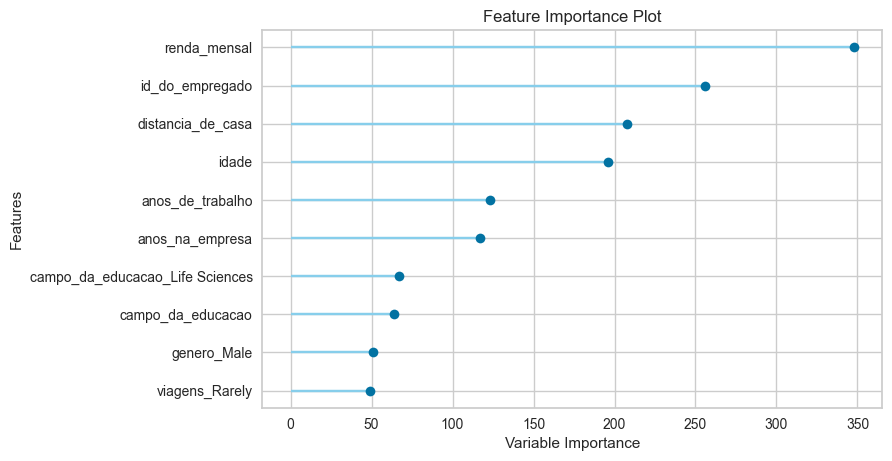

In [25]:
plot_model(best_one,'feature')

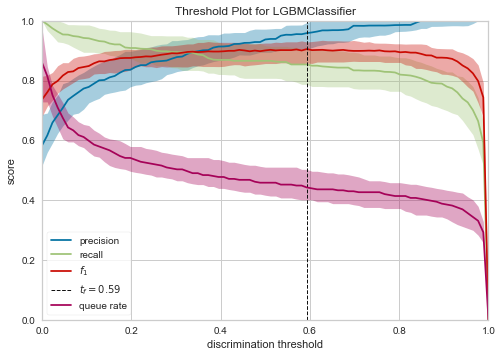

In [27]:
plot_model(best_one,'threshold')

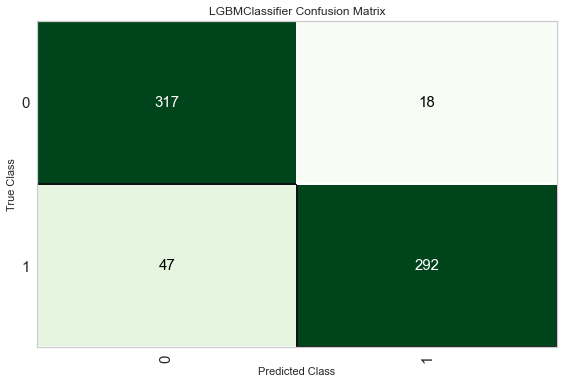

In [29]:
plot_model(best_one,'confusion_matrix')

**Selecionei os dois modelos com melhores resultados no pycaret**

# Selção de feature com SelectKBest

In [60]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.pipeline import Pipeline

In [61]:
parameters = {
            'reduce_dim__k': np.arange(1, len(X_train.columns)+1).tolist()
            }

pipek = Pipeline(steps=[('reduce_dim', SelectKBest(chi2)), ('model',RandomForestClassifier() )])
searchk = GridSearchCV(pipek, parameters,verbose=3, scoring = 'precision', cv=3)
searchk.fit(X_train, y_train)
searchk.best_params_ 

Fitting 3 folds for each of 46 candidates, totalling 138 fits
[CV] reduce_dim__k=1 .................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..................... reduce_dim__k=1, score=0.604, total=   0.2s
[CV] reduce_dim__k=1 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ..................... reduce_dim__k=1, score=0.610, total=   0.2s
[CV] reduce_dim__k=1 .................................................
[CV] ..................... reduce_dim__k=1, score=0.604, total=   0.2s
[CV] reduce_dim__k=2 .................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV] ..................... reduce_dim__k=2, score=0.708, total=   0.2s
[CV] reduce_dim__k=2 .................................................
[CV] ..................... reduce_dim__k=2, score=0.728, total=   0.2s
[CV] reduce_dim__k=2 .................................................
[CV] ..................... reduce_dim__k=2, score=0.777, total=   0.2s
[CV] reduce_dim__k=3 .................................................
[CV] ..................... reduce_dim__k=3, score=0.673, total=   0.2s
[CV] reduce_dim__k=3 .................................................
[CV] ..................... reduce_dim__k=3, score=0.725, total=   0.2s
[CV] reduce_dim__k=3 .................................................
[CV] ..................... reduce_dim__k=3, score=0.748, total=   0.2s
[CV] reduce_dim__k=4 .................................................
[CV] ..................... reduce_dim__k=4, score=0.748, total=   0.2s
[CV] reduce_dim__k=4 .................................................
[CV] .

[CV] .................... reduce_dim__k=21, score=0.918, total=   0.2s
[CV] reduce_dim__k=21 ................................................
[CV] .................... reduce_dim__k=21, score=0.873, total=   0.2s
[CV] reduce_dim__k=22 ................................................
[CV] .................... reduce_dim__k=22, score=0.903, total=   0.2s
[CV] reduce_dim__k=22 ................................................
[CV] .................... reduce_dim__k=22, score=0.908, total=   0.2s
[CV] reduce_dim__k=22 ................................................
[CV] .................... reduce_dim__k=22, score=0.859, total=   0.2s
[CV] reduce_dim__k=23 ................................................
[CV] .................... reduce_dim__k=23, score=0.898, total=   0.2s
[CV] reduce_dim__k=23 ................................................
[CV] .................... reduce_dim__k=23, score=0.909, total=   0.2s
[CV] reduce_dim__k=23 ................................................
[CV] .

[CV] .................... reduce_dim__k=40, score=0.927, total=   0.2s
[CV] reduce_dim__k=41 ................................................
[CV] .................... reduce_dim__k=41, score=0.919, total=   0.2s
[CV] reduce_dim__k=41 ................................................
[CV] .................... reduce_dim__k=41, score=0.929, total=   0.2s
[CV] reduce_dim__k=41 ................................................
[CV] .................... reduce_dim__k=41, score=0.922, total=   0.2s
[CV] reduce_dim__k=42 ................................................
[CV] .................... reduce_dim__k=42, score=0.938, total=   0.2s
[CV] reduce_dim__k=42 ................................................
[CV] .................... reduce_dim__k=42, score=0.962, total=   0.2s
[CV] reduce_dim__k=42 ................................................
[CV] .................... reduce_dim__k=42, score=0.920, total=   0.2s
[CV] reduce_dim__k=43 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done 138 out of 138 | elapsed:   30.2s finished


{'reduce_dim__k': 46}

In [62]:
cols = searchk.best_estimator_['reduce_dim'].get_support(indices=True)
features_df_new = X_train.iloc[:,cols]
col_bk = features_df_new.head().columns.tolist();col_bk

['idade',
 'viagens',
 'departamento',
 'distancia_de_casa',
 'nivel_educacional',
 'campo_da_educacao',
 'id_do_empregado',
 'satisfacao_com_ambiente',
 'genero',
 'envolvimento_com_o_trabalho',
 'cargo',
 'satisfacao_com_trabalho',
 'renda_mensal',
 'numero_de_companhias_que_trabalhou',
 'percentual_de_aumento_salarial',
 'desempenho',
 'satisfacao_com_relacionamento',
 'anos_de_trabalho',
 'treinamentos_no_ultimo_ano',
 'equilibrio_vida_trabalho',
 'anos_na_empresa',
 'anos_desde_a_ultima_promocao',
 'anos_com_atual_gestor',
 'viagens_Frequently',
 'viagens_Non-Travel',
 'viagens_Rarely',
 'departamento_Human Resources',
 'departamento_Research & Development',
 'departamento_Sales',
 'campo_da_educacao_Human Resources',
 'campo_da_educacao_Life Sciences',
 'campo_da_educacao_Marketing',
 'campo_da_educacao_Medical',
 'campo_da_educacao_Other',
 'campo_da_educacao_Technical Degree',
 'genero_Female',
 'genero_Male',
 'cargo_Healthcare Representative',
 'cargo_Human Resources',
 'carg

# Aplicação das features selecionadas no modelo RandomForest

In [65]:
parameters = {'n_estimators':np.arange(2,110,10), 'max_depth':np.arange(2,40,5).tolist()+[None]}

In [66]:
clf = GridSearchCV(RandomForestClassifier(), parameters, verbose=3,cv=4)
clf.fit(X_train[col_bk] ,  y_train)

Fitting 4 folds for each of 99 candidates, totalling 396 fits
[CV] max_depth=2, n_estimators=2 .....................................
[CV] ......... max_depth=2, n_estimators=2, score=0.664, total=   0.0s
[CV] max_depth=2, n_estimators=2 .....................................
[CV] ......... max_depth=2, n_estimators=2, score=0.684, total=   0.0s
[CV] max_depth=2, n_estimators=2 .....................................
[CV] ......... max_depth=2, n_estimators=2, score=0.684, total=   0.0s
[CV] max_depth=2, n_estimators=2 .....................................
[CV] ......... max_depth=2, n_estimators=2, score=0.696, total=   0.0s
[CV] max_depth=2, n_estimators=12 ....................................
[CV] ........ max_depth=2, n_estimators=12, score=0.824, total=   0.0s
[CV] max_depth=2, n_estimators=12 ....................................
[CV] ........ max_depth=2, n_estimators=12, score=0.835, total=   0.0s
[CV] max_depth=2, n_estimators=12 ....................................
[CV] ........ m

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ........ max_depth=2, n_estimators=22, score=0.745, total=   0.0s
[CV] max_depth=2, n_estimators=22 ....................................
[CV] ........ max_depth=2, n_estimators=22, score=0.778, total=   0.0s
[CV] max_depth=2, n_estimators=32 ....................................
[CV] ........ max_depth=2, n_estimators=32, score=0.807, total=   0.0s
[CV] max_depth=2, n_estimators=32 ....................................
[CV] ........ max_depth=2, n_estimators=32, score=0.860, total=   0.0s
[CV] max_depth=2, n_estimators=32 ....................................
[CV] ........ max_depth=2, n_estimators=32, score=0.760, total=   0.0s
[CV] max_depth=2, n_estimators=32 ....................................
[CV] ........ max_depth=2, n_estimators=32, score=0.816, total=   0.0s
[CV] max_depth=2, n_estimators=42 ....................................
[CV] ........ max_depth=2, n_estimators=42, score=0.827, total=   0.1s
[CV] max_depth=2, n_estimators=42 ....................................
[CV] .

[CV] ........ max_depth=7, n_estimators=62, score=0.898, total=   0.1s
[CV] max_depth=7, n_estimators=62 ....................................
[CV] ........ max_depth=7, n_estimators=62, score=0.926, total=   0.1s
[CV] max_depth=7, n_estimators=62 ....................................
[CV] ........ max_depth=7, n_estimators=62, score=0.870, total=   0.1s
[CV] max_depth=7, n_estimators=62 ....................................
[CV] ........ max_depth=7, n_estimators=62, score=0.898, total=   0.1s
[CV] max_depth=7, n_estimators=72 ....................................
[CV] ........ max_depth=7, n_estimators=72, score=0.883, total=   0.1s
[CV] max_depth=7, n_estimators=72 ....................................
[CV] ........ max_depth=7, n_estimators=72, score=0.919, total=   0.1s
[CV] max_depth=7, n_estimators=72 ....................................
[CV] ........ max_depth=7, n_estimators=72, score=0.867, total=   0.1s
[CV] max_depth=7, n_estimators=72 ....................................
[CV] .

[CV] ....... max_depth=12, n_estimators=92, score=0.901, total=   0.2s
[CV] max_depth=12, n_estimators=102 ..................................
[CV] ...... max_depth=12, n_estimators=102, score=0.896, total=   0.2s
[CV] max_depth=12, n_estimators=102 ..................................
[CV] ...... max_depth=12, n_estimators=102, score=0.926, total=   0.2s
[CV] max_depth=12, n_estimators=102 ..................................
[CV] ...... max_depth=12, n_estimators=102, score=0.903, total=   0.2s
[CV] max_depth=12, n_estimators=102 ..................................
[CV] ...... max_depth=12, n_estimators=102, score=0.901, total=   0.2s
[CV] max_depth=17, n_estimators=2 ....................................
[CV] ........ max_depth=17, n_estimators=2, score=0.804, total=   0.0s
[CV] max_depth=17, n_estimators=2 ....................................
[CV] ........ max_depth=17, n_estimators=2, score=0.809, total=   0.0s
[CV] max_depth=17, n_estimators=2 ....................................
[CV] .

[CV] ....... max_depth=22, n_estimators=22, score=0.901, total=   0.0s
[CV] max_depth=22, n_estimators=22 ...................................
[CV] ....... max_depth=22, n_estimators=22, score=0.890, total=   0.0s
[CV] max_depth=22, n_estimators=22 ...................................
[CV] ....... max_depth=22, n_estimators=22, score=0.870, total=   0.0s
[CV] max_depth=22, n_estimators=32 ...................................
[CV] ....... max_depth=22, n_estimators=32, score=0.898, total=   0.1s
[CV] max_depth=22, n_estimators=32 ...................................
[CV] ....... max_depth=22, n_estimators=32, score=0.921, total=   0.1s
[CV] max_depth=22, n_estimators=32 ...................................
[CV] ....... max_depth=22, n_estimators=32, score=0.885, total=   0.1s
[CV] max_depth=22, n_estimators=32 ...................................
[CV] ....... max_depth=22, n_estimators=32, score=0.895, total=   0.1s
[CV] max_depth=22, n_estimators=42 ...................................
[CV] .

[CV] ....... max_depth=27, n_estimators=52, score=0.885, total=   0.1s
[CV] max_depth=27, n_estimators=62 ...................................
[CV] ....... max_depth=27, n_estimators=62, score=0.893, total=   0.1s
[CV] max_depth=27, n_estimators=62 ...................................
[CV] ....... max_depth=27, n_estimators=62, score=0.911, total=   0.1s
[CV] max_depth=27, n_estimators=62 ...................................
[CV] ....... max_depth=27, n_estimators=62, score=0.888, total=   0.1s
[CV] max_depth=27, n_estimators=62 ...................................
[CV] ....... max_depth=27, n_estimators=62, score=0.898, total=   0.1s
[CV] max_depth=27, n_estimators=72 ...................................
[CV] ....... max_depth=27, n_estimators=72, score=0.891, total=   0.1s
[CV] max_depth=27, n_estimators=72 ...................................
[CV] ....... max_depth=27, n_estimators=72, score=0.919, total=   0.1s
[CV] max_depth=27, n_estimators=72 ...................................
[CV] .

[CV] ....... max_depth=32, n_estimators=92, score=0.931, total=   0.2s
[CV] max_depth=32, n_estimators=92 ...................................
[CV] ....... max_depth=32, n_estimators=92, score=0.906, total=   0.2s
[CV] max_depth=32, n_estimators=92 ...................................
[CV] ....... max_depth=32, n_estimators=92, score=0.890, total=   0.2s
[CV] max_depth=32, n_estimators=102 ..................................
[CV] ...... max_depth=32, n_estimators=102, score=0.893, total=   0.2s
[CV] max_depth=32, n_estimators=102 ..................................
[CV] ...... max_depth=32, n_estimators=102, score=0.924, total=   0.2s
[CV] max_depth=32, n_estimators=102 ..................................
[CV] ...... max_depth=32, n_estimators=102, score=0.913, total=   0.2s
[CV] max_depth=32, n_estimators=102 ..................................
[CV] ...... max_depth=32, n_estimators=102, score=0.906, total=   0.2s
[CV] max_depth=37, n_estimators=2 ....................................
[CV] .

[CV] ..... max_depth=None, n_estimators=22, score=0.901, total=   0.1s
[CV] max_depth=None, n_estimators=22 .................................
[CV] ..... max_depth=None, n_estimators=22, score=0.893, total=   0.0s
[CV] max_depth=None, n_estimators=22 .................................
[CV] ..... max_depth=None, n_estimators=22, score=0.883, total=   0.0s
[CV] max_depth=None, n_estimators=32 .................................
[CV] ..... max_depth=None, n_estimators=32, score=0.888, total=   0.1s
[CV] max_depth=None, n_estimators=32 .................................
[CV] ..... max_depth=None, n_estimators=32, score=0.916, total=   0.1s
[CV] max_depth=None, n_estimators=32 .................................
[CV] ..... max_depth=None, n_estimators=32, score=0.898, total=   0.1s
[CV] max_depth=None, n_estimators=32 .................................
[CV] ..... max_depth=None, n_estimators=32, score=0.895, total=   0.1s
[CV] max_depth=None, n_estimators=42 .................................
[CV] .

[Parallel(n_jobs=1)]: Done 396 out of 396 | elapsed:   37.9s finished


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [67]:
y_predict = clf.predict(X_test[col_bk])

[Text(0.5, 29.5, 'Predict'), Text(52.0, 0.5, 'Real')]

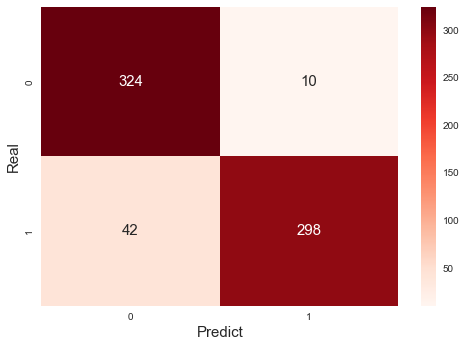

In [68]:

mc = confusion_matrix(y_test, y_predict)
plt.plot(figsize=(5,4))
sns.heatmap(mc, annot=True, cmap="Reds", fmt="d").set(xlabel="Predict", ylabel="Real")

In [69]:
print(print(classification_report(y_test, y_predict)))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       334
           1       0.97      0.88      0.92       340

    accuracy                           0.92       674
   macro avg       0.93      0.92      0.92       674
weighted avg       0.93      0.92      0.92       674

None


# Feature importance para o modelo

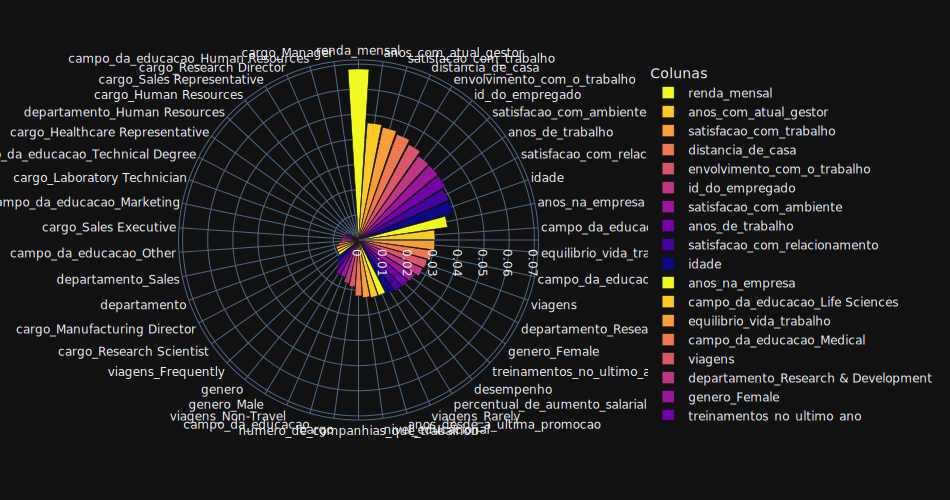

In [71]:
d = {'Colunas':X_train[col_bk] .columns,'FI':clf.best_estimator_.feature_importances_}
df_ = pd.DataFrame(d)

df_ = df_.sort_values(by='FI', ascending=0)

fig = px.bar_polar(df_, r="FI", theta="Colunas",
                   color="Colunas", template="plotly_dark",
                   color_discrete_sequence= px.colors.sequential.Plasma_r)
fig.show(renderer="svg", width=950, height=500)

# Aplicação das colunas selecionadas para o modelo LGBM

In [72]:
from lightgbm import LGBMClassifier

In [73]:
clf = GridSearchCV(LGBMClassifier(), parameters, verbose=3,cv=4)
clf.fit(X_train[col_bk] ,  y_train)

Fitting 4 folds for each of 99 candidates, totalling 396 fits
[CV] max_depth=2, n_estimators=2 .....................................
[CV] ......... max_depth=2, n_estimators=2, score=0.712, total=   0.0s
[CV] max_depth=2, n_estimators=2 .....................................
[CV] ......... max_depth=2, n_estimators=2, score=0.758, total=   0.0s
[CV] max_depth=2, n_estimators=2 .....................................
[CV] ......... max_depth=2, n_estimators=2, score=0.679, total=   0.0s
[CV] max_depth=2, n_estimators=2 .....................................
[CV] ......... max_depth=2, n_estimators=2, score=0.694, total=   0.0s
[CV] max_depth=2, n_estimators=12 ....................................
[CV] ........ max_depth=2, n_estimators=12, score=0.824, total=   0.0s
[CV] max_depth=2, n_estimators=12 ....................................
[CV] ........ max_depth=2, n_estimators=12, score=0.860, total=   0.0s
[CV] max_depth=2, n_estimators=12 ....................................
[CV] ........ m

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] max_depth=2, n_estimators=22 ....................................
[CV] ........ max_depth=2, n_estimators=22, score=0.878, total=   0.0s
[CV] max_depth=2, n_estimators=22 ....................................
[CV] ........ max_depth=2, n_estimators=22, score=0.786, total=   0.0s
[CV] max_depth=2, n_estimators=22 ....................................
[CV] ........ max_depth=2, n_estimators=22, score=0.842, total=   0.0s
[CV] max_depth=2, n_estimators=32 ....................................
[CV] ........ max_depth=2, n_estimators=32, score=0.858, total=   0.0s
[CV] max_depth=2, n_estimators=32 ....................................
[CV] ........ max_depth=2, n_estimators=32, score=0.883, total=   0.0s
[CV] max_depth=2, n_estimators=32 ....................................
[CV] ........ max_depth=2, n_estimators=32, score=0.832, total=   0.0s
[CV] max_depth=2, n_estimators=32 ....................................
[CV] ........ max_depth=2, n_estimators=32, score=0.847, total=   0.0s
[CV] m

[CV] max_depth=7, n_estimators=62 ....................................
[CV] ........ max_depth=7, n_estimators=62, score=0.906, total=   0.1s
[CV] max_depth=7, n_estimators=62 ....................................
[CV] ........ max_depth=7, n_estimators=62, score=0.883, total=   0.1s
[CV] max_depth=7, n_estimators=62 ....................................
[CV] ........ max_depth=7, n_estimators=62, score=0.901, total=   0.1s
[CV] max_depth=7, n_estimators=72 ....................................
[CV] ........ max_depth=7, n_estimators=72, score=0.893, total=   0.1s
[CV] max_depth=7, n_estimators=72 ....................................
[CV] ........ max_depth=7, n_estimators=72, score=0.908, total=   0.1s
[CV] max_depth=7, n_estimators=72 ....................................
[CV] ........ max_depth=7, n_estimators=72, score=0.888, total=   0.1s
[CV] max_depth=7, n_estimators=72 ....................................
[CV] ........ max_depth=7, n_estimators=72, score=0.903, total=   0.1s
[CV] m

[CV] max_depth=12, n_estimators=102 ..................................
[CV] ...... max_depth=12, n_estimators=102, score=0.888, total=   0.1s
[CV] max_depth=12, n_estimators=102 ..................................
[CV] ...... max_depth=12, n_estimators=102, score=0.901, total=   0.1s
[CV] max_depth=12, n_estimators=102 ..................................
[CV] ...... max_depth=12, n_estimators=102, score=0.895, total=   0.1s
[CV] max_depth=12, n_estimators=102 ..................................
[CV] ...... max_depth=12, n_estimators=102, score=0.903, total=   0.1s
[CV] max_depth=17, n_estimators=2 ....................................
[CV] ........ max_depth=17, n_estimators=2, score=0.751, total=   0.0s
[CV] max_depth=17, n_estimators=2 ....................................
[CV] ........ max_depth=17, n_estimators=2, score=0.832, total=   0.0s
[CV] max_depth=17, n_estimators=2 ....................................
[CV] ........ max_depth=17, n_estimators=2, score=0.839, total=   0.0s
[CV] m

[CV] max_depth=22, n_estimators=22 ...................................
[CV] ....... max_depth=22, n_estimators=22, score=0.878, total=   0.0s
[CV] max_depth=22, n_estimators=22 ...................................
[CV] ....... max_depth=22, n_estimators=22, score=0.885, total=   0.0s
[CV] max_depth=22, n_estimators=32 ...................................
[CV] ....... max_depth=22, n_estimators=32, score=0.878, total=   0.0s
[CV] max_depth=22, n_estimators=32 ...................................
[CV] ....... max_depth=22, n_estimators=32, score=0.901, total=   0.0s
[CV] max_depth=22, n_estimators=32 ...................................
[CV] ....... max_depth=22, n_estimators=32, score=0.880, total=   0.0s
[CV] max_depth=22, n_estimators=32 ...................................
[CV] ....... max_depth=22, n_estimators=32, score=0.898, total=   0.0s
[CV] max_depth=22, n_estimators=42 ...................................
[CV] ....... max_depth=22, n_estimators=42, score=0.888, total=   0.1s
[CV] m

[CV] max_depth=27, n_estimators=62 ...................................
[CV] ....... max_depth=27, n_estimators=62, score=0.891, total=   0.1s
[CV] max_depth=27, n_estimators=62 ...................................
[CV] ....... max_depth=27, n_estimators=62, score=0.906, total=   0.1s
[CV] max_depth=27, n_estimators=62 ...................................
[CV] ....... max_depth=27, n_estimators=62, score=0.890, total=   0.1s
[CV] max_depth=27, n_estimators=62 ...................................
[CV] ....... max_depth=27, n_estimators=62, score=0.893, total=   0.1s
[CV] max_depth=27, n_estimators=72 ...................................
[CV] ....... max_depth=27, n_estimators=72, score=0.888, total=   0.1s
[CV] max_depth=27, n_estimators=72 ...................................
[CV] ....... max_depth=27, n_estimators=72, score=0.903, total=   0.1s
[CV] max_depth=27, n_estimators=72 ...................................
[CV] ....... max_depth=27, n_estimators=72, score=0.885, total=   0.1s
[CV] m

[CV] max_depth=32, n_estimators=102 ..................................
[CV] ...... max_depth=32, n_estimators=102, score=0.888, total=   0.1s
[CV] max_depth=32, n_estimators=102 ..................................
[CV] ...... max_depth=32, n_estimators=102, score=0.901, total=   0.1s
[CV] max_depth=32, n_estimators=102 ..................................
[CV] ...... max_depth=32, n_estimators=102, score=0.893, total=   0.1s
[CV] max_depth=32, n_estimators=102 ..................................
[CV] ...... max_depth=32, n_estimators=102, score=0.890, total=   0.1s
[CV] max_depth=37, n_estimators=2 ....................................
[CV] ........ max_depth=37, n_estimators=2, score=0.751, total=   0.0s
[CV] max_depth=37, n_estimators=2 ....................................
[CV] ........ max_depth=37, n_estimators=2, score=0.832, total=   0.0s
[CV] max_depth=37, n_estimators=2 ....................................
[CV] ........ max_depth=37, n_estimators=2, score=0.839, total=   0.0s
[CV] m

[CV] max_depth=None, n_estimators=22 .................................
[CV] ..... max_depth=None, n_estimators=22, score=0.878, total=   0.0s
[CV] max_depth=None, n_estimators=22 .................................
[CV] ..... max_depth=None, n_estimators=22, score=0.885, total=   0.0s
[CV] max_depth=None, n_estimators=32 .................................
[CV] ..... max_depth=None, n_estimators=32, score=0.878, total=   0.0s
[CV] max_depth=None, n_estimators=32 .................................
[CV] ..... max_depth=None, n_estimators=32, score=0.901, total=   0.0s
[CV] max_depth=None, n_estimators=32 .................................
[CV] ..... max_depth=None, n_estimators=32, score=0.880, total=   0.0s
[CV] max_depth=None, n_estimators=32 .................................
[CV] ..... max_depth=None, n_estimators=32, score=0.898, total=   0.1s
[CV] max_depth=None, n_estimators=42 .................................
[CV] ..... max_depth=None, n_estimators=42, score=0.888, total=   0.1s
[CV] m

[Parallel(n_jobs=1)]: Done 396 out of 396 | elapsed:   24.0s finished


GridSearchCV(cv=4, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_state=None, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [2, 7, 12, 17, 22, 27, 32, 37, None],
                  

In [75]:
y_predict = clf.predict(X_test[col_bk])

[Text(0.5, 29.5, 'Predict'), Text(52.0, 0.5, 'Real')]

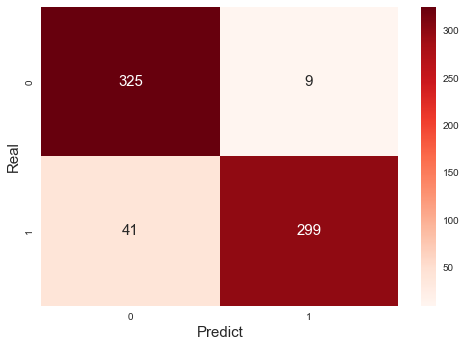

In [76]:

mc = confusion_matrix(y_test, y_predict)
plt.plot(figsize=(5,4))
sns.heatmap(mc, annot=True, cmap="Reds", fmt="d").set(xlabel="Predict", ylabel="Real")

In [77]:
print(print(classification_report(y_test, y_predict)))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       334
           1       0.97      0.88      0.92       340

    accuracy                           0.93       674
   macro avg       0.93      0.93      0.93       674
weighted avg       0.93      0.93      0.93       674

None


# Feature importance para o modelo

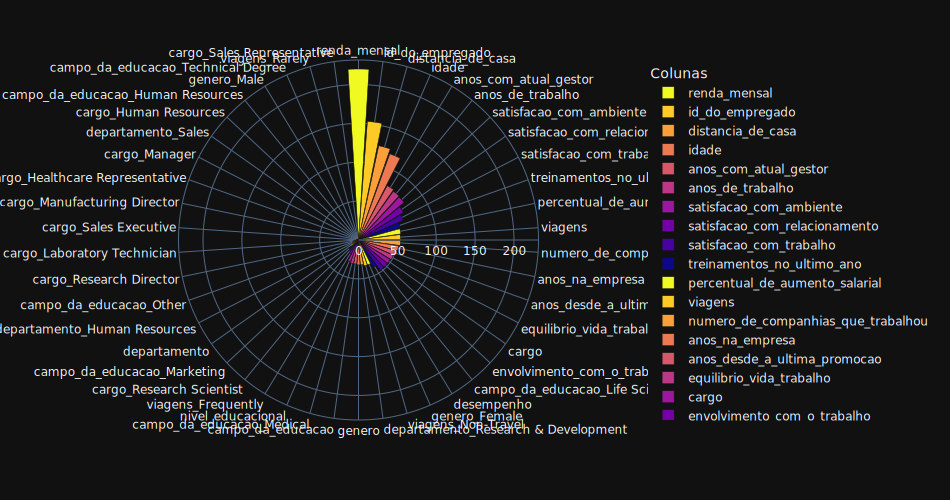

In [74]:
d = {'Colunas':X_train[col_bk] .columns,'FI':clf.best_estimator_.feature_importances_}
df_ = pd.DataFrame(d)

df_ = df_.sort_values(by='FI', ascending=0)

fig = px.bar_polar(df_, r="FI", theta="Colunas",
                   color="Colunas", template="plotly_dark",
                   color_discrete_sequence= px.colors.sequential.Plasma_r)
fig.show(renderer="svg", width=950, height=500)

# Conclusão
- **O modelo que melhor de adaptou foi o LGBM, teve melhores metricas para o negócio**
- **Features possuem uma correlação baixa comparada ao target, acredito que um breve estudo para aplicar feature engineering poderia ajudar mais ainda o modelo**


# Análise do threshold

In [79]:
from yellowbrick.classifier import DiscriminationThreshold

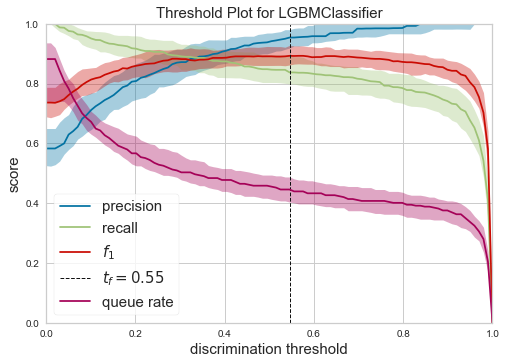

<AxesSubplot:title={'center':'Threshold Plot for LGBMClassifier'}, xlabel='discrimination threshold', ylabel='score'>

In [81]:
visualizer = DiscriminationThreshold(clf.best_estimator_)

visualizer.fit(X_train, y_train)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure